In [1]:
from pathlib import Path
import random

import matplotlib.pyplot as plt
from minisom import MiniSom
import pandas as pd

In [2]:
pwd = Path.cwd()
project_dir = pwd.parent
csv_file = project_dir / "data" / "students.csv"

In [3]:
df_students = pd.read_csv(csv_file, index_col="name")

In [4]:
df_interests = pd.DataFrame(df_students["interests"], index=df_students.index)
df_students.drop(columns=["interests"], inplace=True)

In [5]:
# Add colours for interests
color_symbol = {"art": "k", "science": "b", "sport": "r"}
color_array = [color_symbol[color] for color in df_interests["interests"]]
df_interests["color"] = color_array

In [6]:
# Initialize and train
som = MiniSom(13, 13, 14, sigma=1.5, learning_rate=1, 
              neighborhood_function='gaussian', random_seed=10)

som.pca_weights_init(df_students.values)
som.train_batch(df_students.values, 1000, verbose=False)

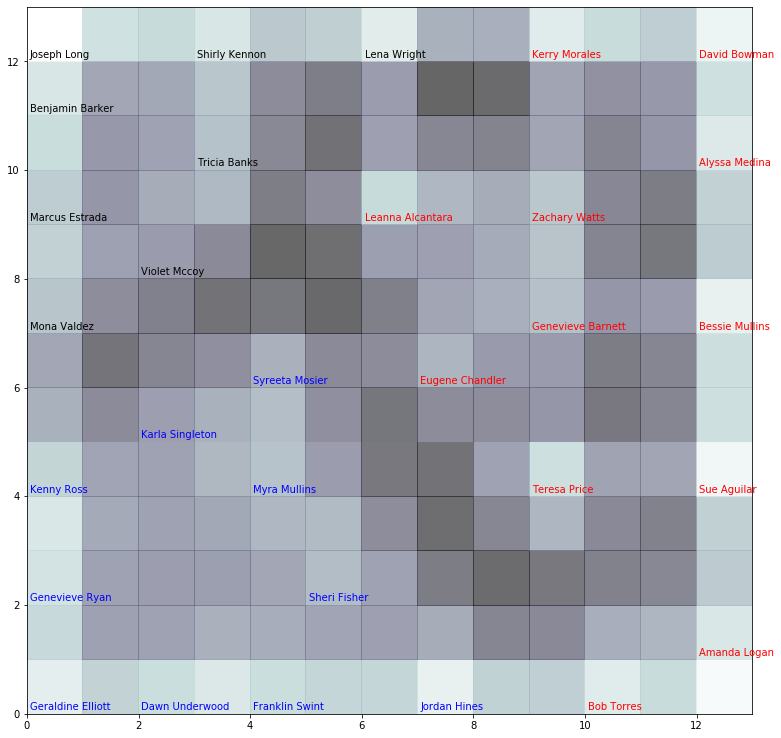

In [7]:
# Plot
plt.figure(figsize=(13, 13))
_var = {(i, j): 0 for i in range(13) for j in range(13)}
# Plotting
for name, *properties, color in zip(df_students.index, df_students.values, df_interests["color"]):
    w = som.winner(properties)
    _var[w] += 1
    plt.text(w[0]+0.05, w[1]+0.22*_var[w]-0.15, name, color=color)
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.6)